# Barabasi-Albert Model

### The Barabasi-Albert model uses two parameters, $n$ for the number of nodes, and $m$ for the number of edges per node. The model begins with $m$ nodes in an empty graph, and at each next step, a node is added, with m edges connected to other nodes. The probability of the new node being connected to a node is equal to the proportion of the degree of the node to the total degree of the graph.

First, we define a function to draw the graph. Starting with an empty graph, we add $m$ nodes into the graph, and proceed to define the random adding process for the $(n-m)$ remaining nodes. The first addition would have $m$ edges connected to $m$ nodes, thus it would be connected to every other node in the graph.

After the first addition, we use the node_preferential list to add nodes according to their degree. The higher the degree, the more instances of the node will be added into the list. A random choice function is then used to pick a node to add an edge to, and this process is repeated until $m$ edges are formed for the new node.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def barabasi_albert(n, m):
    
    g = nx.Graph()
    for initial in range(m):
        g.add_node(initial)
    for i in range(n-m):
        g.add_node(i+m)
        
        # For the first addition, where the new node is connected to all others
        if i == 0:                   
            for node in range(i+m):
                g.add_edge(node, i+m)
        else:
            edges = 0
            while edges < m:
                node_preferential = []  
                
                # The list contains values of nodes, with instances equal to their degree
                
                for node in range(i+m):   
                    for repeat in range(g.degree(node)):
                        node_preferential.append(node)
                node_chosen = np.random.choice(node_preferential)
                if g.has_edge(node_chosen, i+m) == True:  # If an edge exists already, the process is restarted
                    continue
                else:
                    g.add_edge(node_chosen, i+m)
                    edges+=1
    return g

Now that the function is defined, we can test it. In this case, $n$ is 50, and $m$ is 4.

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 184
Average degree:   7.3600
Global clustering coefficient: 0.22988853148915062


C:\Users\kjkchang\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


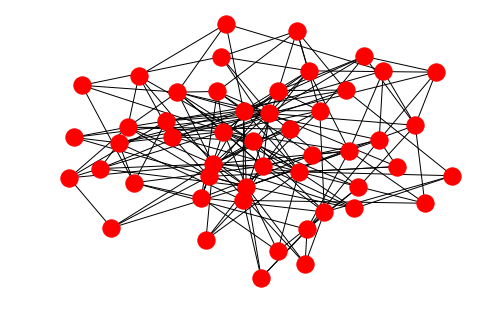

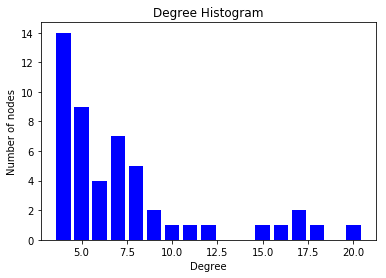

In [2]:
from collections import Counter

graph = barabasi_albert(50, 4)
print(nx.info(graph))
print(f"Global clustering coefficient: {nx.average_clustering(graph)}")
nx.draw(graph)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

For comparison, a Barabasi-Albert Model drawn using the Networkx libary is shown below.

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 184
Average degree:   7.3600
Global clustering coefficient: 0.3011102535808418


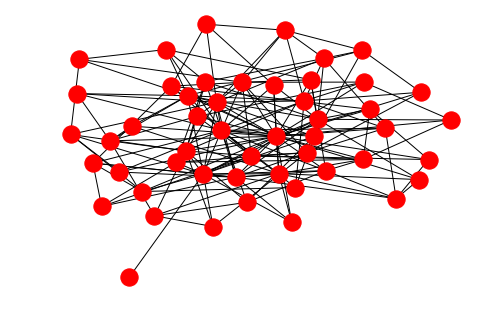

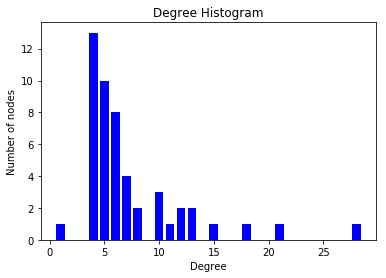

In [3]:
graph = nx.barabasi_albert_graph(50, 4)
print(nx.info(graph))
print(f"Global clustering coefficient: {nx.average_clustering(graph)}")
nx.draw(graph)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

In [4]:
# Exponent: 1
import time
import math

# Function for drawing the barabasi-albert model

def barabasi_albert_2(n, m, e = 2):
    g = nx.empty_graph(m)
    edges = []
    g.add_edges_from([(i, m) for i in range(m)])
    
    for i in range(m+1, n):
        g.add_node(i)
        nodes = []
        p_total = sum(map(lambda x: g.degree(x)**e, np.array(range(i))))
        
        def p_dist(node):
            return g.degree(node)**e / p_total
        p_dist = np.vectorize(p_dist)
        p = p_dist(list(range(i)))
    
        while len(set(nodes)) < 4:
            nodes = np.random.choice(list(range(i)), size = m, p = p)
        g.add_edges_from([(i, node) for node in nodes])
        
    return g

# Function for collecting clustering of graphs for n = 50 and m = 4

def barabasi_albert_test(trials, e = 1):
    g = barabasi_albert_2(50, 4, e)
    return nx.transitivity(g)

# collate() function is for running previous function several times to get a mean.

def collate(e):
    res = np.mean(list(map(lambda x, y: barabasi_albert_test(x, e = y), np.random.ranf(10), np.full(10, e))))
    return res

In [5]:
toc = time.time()
power = np.arange(0, 3, 0.01)
cluster = list(map(collate, power))
tic = time.time()
print(f"Time taken: {np.round(tic-toc, 3)}")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\kjkchang\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-cf214c9bb04a>", line 3, in <module>
    cluster = list(map(collate, power))
  File "<ipython-input-4-5050dbef34dc>", line 37, in collate
    res = np.mean(list(map(lambda x, y: barabasi_albert_test(x, e = y), np.random.ranf(10), np.full(10, e))))
  File "<ipython-input-4-5050dbef34dc>", line 37, in <lambda>
    res = np.mean(list(map(lambda x, y: barabasi_albert_test(x, e = y), np.random.ranf(10), np.full(10, e))))
  File "<ipython-input-4-5050dbef34dc>", line 31, in barabasi_albert_test
    g = barabasi_albert_2(50, 4, e)
  File "<ipython-input-4-5050dbef34dc>", line 23, in barabasi_albert_2
    nodes = np.random.choice(list(range(i)), size = m, p = p)
KeyboardInterrupt

During handling of the above exception, another exception occurred:



KeyboardInterrupt: 

In [ ]:
plt.plot(power, cluster)
plt.xlabel("Exponent")
plt.ylabel("Clustering coefficient")
plt.show()

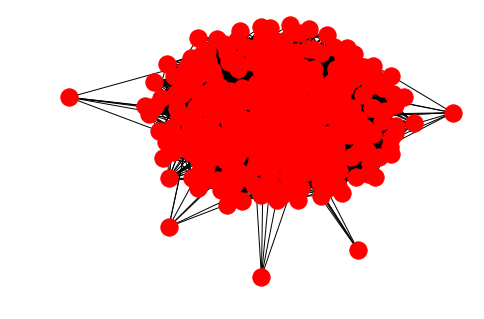

0.17253754835773344
0.18127805064305272


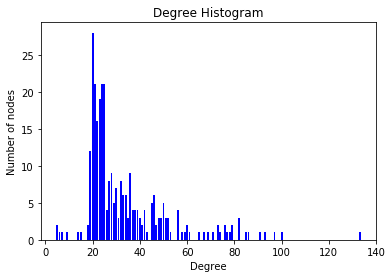

In [12]:
g = barabasi_albert_2(300, 20, 1)
nx.draw(g)
plt.show()
plt.clf()
print(nx.transitivity(g))
print(nx.average_clustering(g))

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()